In [8]:
from IPython.display import display, HTML

html_code = """
<style>
    /* Contenedor principal con fondo del logo */
    .header-container {
        position: relative;
        background-image: url('https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg');
        background-size: contain;
        background-repeat: no-repeat;
        background-position: center;
        text-align: center;
        padding: 100px 40px;
        background-color: rgba(0, 0, 0, 0.7); /* Fondo oscuro semitransparente */
        border-radius: 10px;
    }

    /* Estilos del texto */
    .header-title {
        font-size: 32px;
        font-weight: bold;
        color: white;
    }

    .header-subtitle {
        font-size: 24px;
        font-weight: bold;
        color: white;
    }

    .header-info {
        font-size: 18px;
        font-weight: normal;
        color: white;
    }
</style>

<div class="header-container">
    <div class="header-title">📌 Fundamentos de Programación - 2025-I</div>
    <div class="header-subtitle">📊 Trabajo Final: Dólar Histórico en Colombia (1991-2024)</div>
    <br>
    <div class="header-info"><strong>👨‍🏫 Docente:</strong> Tomás Atheortua</div>
    <br>
    <div class="header-info">
        <strong>👨‍🎓 Alumnos:</strong> <br>
        1️⃣ Sergio Alejandro Laverde Peña (CC 1.152.217.871) <br>
        2️⃣ Jhon Alejandro Jaramillo Echeverri (CC 1.035.422.452) <br>
        3️⃣ Juan Andrés Ruiz Ramírez (CC 1.121.712.506)
    </div>
</div>
"""

display(HTML(html_code))


<h2>Librerías necesarias:</h2>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pychow import ChowTest

<hr>

<h2>Importación de los datos:</h2>
<p>
    <ul>
        <li>Fuente: Superintendencia Financiera de Colombia</li>
        <li>Tema: Tasa de Cambio Representativa del Mercado - TRM</li>
        <li>Link: <a href=https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/>https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/</a></li>
    </ul>
</p>
<hr>

In [10]:
data = pd.read_csv('./Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7976 non-null   float64
 1   UNIDAD         7976 non-null   object 
 2   VIGENCIADESDE  7976 non-null   object 
 3   VIGENCIAHASTA  7976 non-null   object 
dtypes: float64(1), object(3)
memory usage: 249.4+ KB


<hr>

## ¿Sabías que...?
### Cuando un día es sábado, domingo o festivo en Colombia, a tasa oficial (TRM) seguirá siendo la calculada en el último día que operó el mercado, y tendrá vigencia hasta el día siguiente.

<p><img src="TRM_Calendario.png" style="width: 80%; height: auto;"></p>
<hr>


In [11]:
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4100.66,COP,15/02/2025,18/02/2025
1,4161.46,COP,14/02/2025,14/02/2025
2,4165.07,COP,13/02/2025,13/02/2025
3,4153.80,COP,12/02/2025,12/02/2025
4,4132.93,COP,11/02/2025,11/02/2025
5,4113.70,COP,08/02/2025,10/02/2025
6,4150.99,COP,07/02/2025,07/02/2025
7,4180.06,COP,06/02/2025,06/02/2025
8,4153.54,COP,05/02/2025,05/02/2025
9,4198.66,COP,04/02/2025,04/02/2025


<hr>

<h2>Estructuración de los datos</h1>
<h3>Reto: Completar todos los días con su respectiva TRM</h2>

<hr>

In [12]:
data.index = pd.to_datetime((data['VIGENCIADESDE']), format='%d/%m/%Y') #Convierte VIGENCIADESDE en dato tipo Datetime, reemplaza indice numerico con fechas
data.sort_index(ascending=True, inplace=True) #Ordena DF según indice, ascendente y modificando el DF directamente
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
VIGENCIADESDE,,,,
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991
1991-12-12,633.09,COP,12/12/1991,12/12/1991


In [13]:
full_dates = pd.date_range(min(data.index), max(data.index)) # Se crea fechas intermedias, incluso las que no estaban
data = data.reindex(full_dates) #Cambia el índice del DataFrame para que incluya todas las fechas en full_dates.
data.head(15)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,NaN,NaN,NaN,NaN
1991-12-09,NaN,NaN,NaN,NaN
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Calendario de diciembre de 1991</h2>
<p><img src="Calendario_1991.png" style="width: 20%; display: block; margin: auto;"></p>
<hr>


In [14]:
data.ffill(inplace=True) # Rellena los valores faltantes (NaN) con el último valor disponible.
data.head(15)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,638.06,COP,07/12/1991,09/12/1991
1991-12-09,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Visualización historica TRM</h2>
<hr>

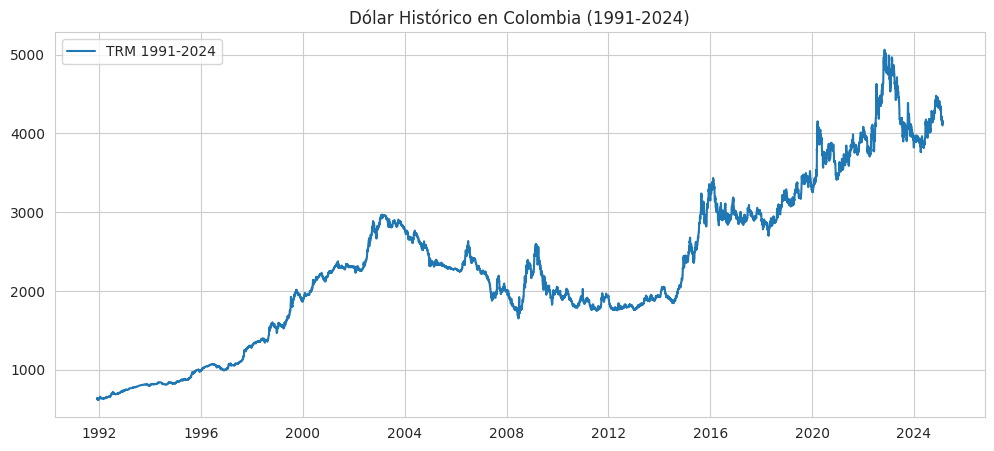

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.title("Dólar Histórico en Colombia (1991-2024)")
sns.lineplot(
    label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index,
).set(xlabel = None, ylabel = None);

<hr>
<h2>Acontecimientos Historicos</h2>

<hr>


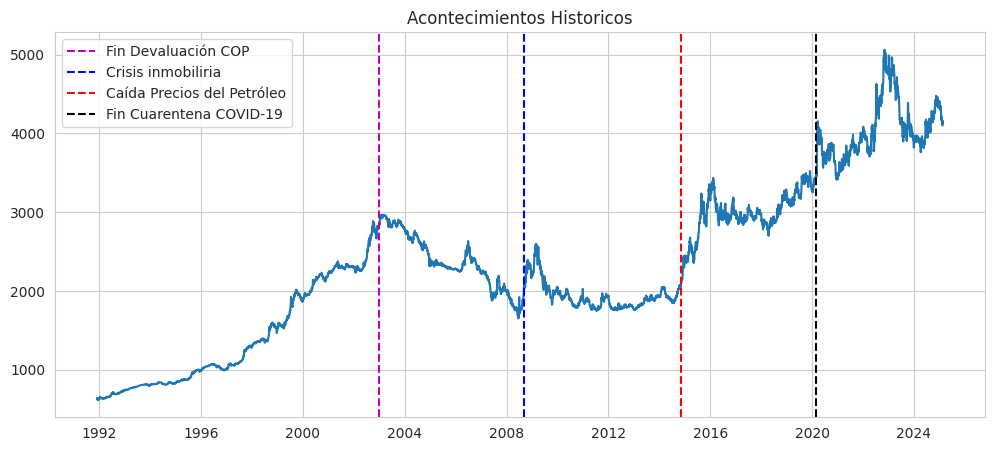

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
).set(xlabel = None, ylabel = None)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Historicos")
plt.axvline(x=pd.Timestamp("2003-01-01"), color="m", linestyle="--", label="Fin Devaluación COP")
plt.axvline(x=pd.Timestamp("2008-09-01"), color="b", linestyle="--", label="Crisis inmobiliria")
plt.axvline(x=pd.Timestamp("2014-11-01"), color="r", linestyle="--", label="Caída Precios del Petróleo")
plt.axvline(x=pd.Timestamp("2020-03-01"), color="k", linestyle="--", label="Fin Cuarentena COVID-19")

# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show();

<hr>
<h2>¿Alguna relación política?</h2>
<hr>

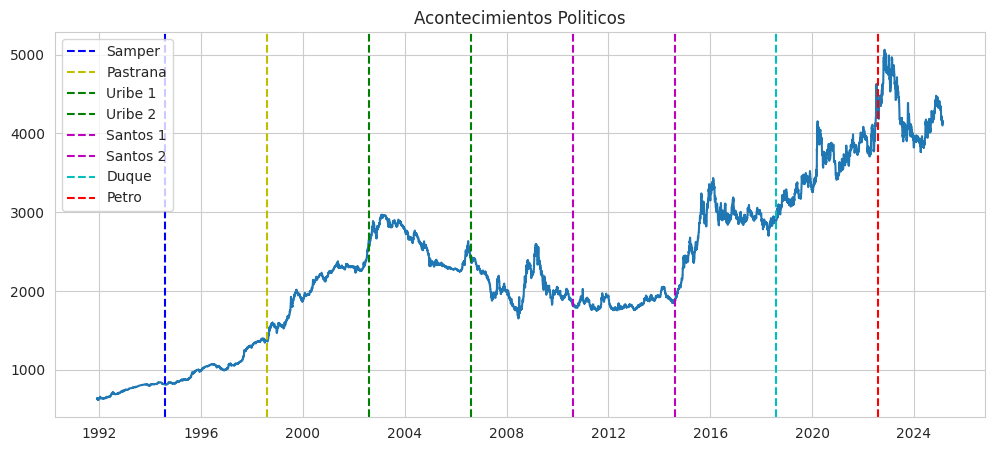

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
).set(xlabel = None, ylabel = None)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Politicos")
plt.axvline(x=pd.Timestamp("1994-08-07"), color="b", linestyle="--", label = "Samper")
plt.axvline(x=pd.Timestamp("1998-08-07"), color="y", linestyle="--", label = "Pastrana")
plt.axvline(x=pd.Timestamp("2002-08-07"), color="g", linestyle="--", label = "Uribe 1")
plt.axvline(x=pd.Timestamp("2006-08-07"), color="g", linestyle="--", label = "Uribe 2")
plt.axvline(x=pd.Timestamp("2010-08-07"), color="m", linestyle="--", label = "Santos 1")
plt.axvline(x=pd.Timestamp("2014-08-07"), color="m", linestyle="--", label = "Santos 2")
plt.axvline(x=pd.Timestamp("2018-08-07"), color="c", linestyle="--", label = "Duque")
plt.axvline(x=pd.Timestamp("2022-08-07"), color="r", linestyle="--", label = "Petro")

# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show();

<hr>
<h2>Planteamiento de las hipótesis</h2>
<p>
    <ol>
        <li>Hay un cambio estructural en la TRM tras la  estabilización de la política monetaria alrededor del 2003</li>
        <li>No hay cambio estructural alguno alrededor de la crisis inmobiliaria del 2008</li>
        <li>Hay un cambio estructural tras la caída de los precios del petróleo alrededor del 2015</li>
    </ol>
</p>
<hr>

# Análisis gráfico exploratorio por segmentos

In [27]:
# Su función es calcular la diferencia entre un valor y su valor anterior en una columna de un DataFrame
data['VALOR'].diff()

1991-12-02      NaN
1991-12-03    -4.20
1991-12-04    -3.52
1991-12-05    -4.19
1991-12-06    -4.35
              ...  
2025-02-11    19.23
2025-02-12    20.87
2025-02-13    11.27
2025-02-14    -3.61
2025-02-15   -60.80
Freq: D, Name: VALOR, Length: 12130, dtype: float64

## Periodo entre 1992 y 2003

In [38]:
# remuestreo (resampling) de una serie temporal en un DataFrame, agrupando los datos por año ('Y') y calculando 
# la media de los valores para cada año.
data_y = data['VALOR'].resample('YE').agg({
        "VALOR": "mean"
})
data_y.head(5)

,VALOR
1991-12-31,629.979000
1992-12-31,680.826475
1993-12-31,786.544082
1994-12-31,826.395479
1995-12-31,912.888466


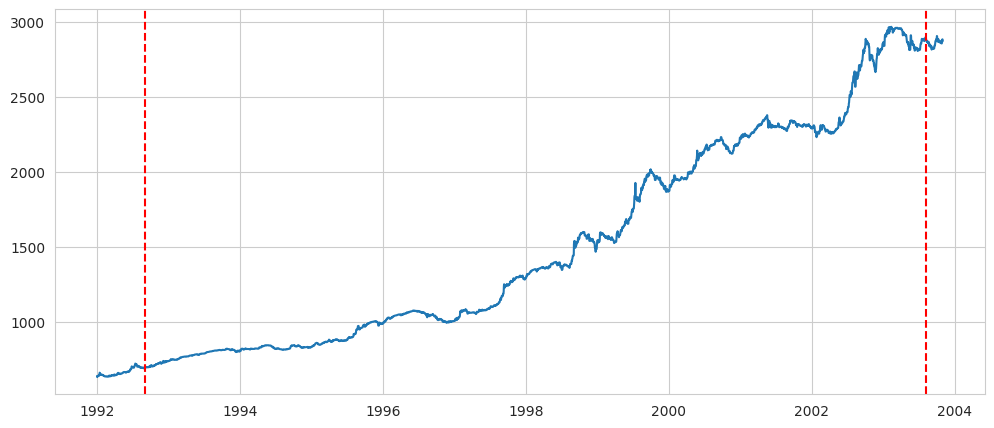

In [43]:
s_1992_2003 = data.loc["1992-01-01":"2003-10-31",["VALOR"]]
s_1992_2003.loc[:,"POSICION"] = np.arange(1, hip2.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = s_1992_2003['VALOR'],
    x = s_1992_2003.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("1992-09-01"), color="r", linestyle="--", label="1992");
plt.axvline(x=pd.Timestamp("2003-08-07"), color="r", linestyle="--", label = "2003")

In [36]:
data['Diferencia'] = data['VALOR'].diff()  # Calcula la diferencia entre años consecutivos
diferencia_1992_2003 = data.loc['2003', 'Diferencia'] - data.loc['1992', 'Diferencia']

In [37]:
diferencia_1992_2003

1992-01-01   NaN
1992-01-02   NaN
1992-01-03   NaN
1992-01-04   NaN
1992-01-05   NaN
              ..
2003-12-27   NaN
2003-12-28   NaN
2003-12-29   NaN
2003-12-30   NaN
2003-12-31   NaN
Name: Diferencia, Length: 731, dtype: float64

<h2>La prueba de Chow</h2>
<p>La prueba de Chow, originalmente planteada en un paper de 1960, es una prueba para determinar si en una serie de tiempo hay un cambio estructural.</p>
<p>$$
F = \frac{(RSS_\text{combined} - (RSS_1 + RSS_2)) / k}{(RSS_1 + RSS_2) / (N_1 + N_2 - 2k)}
$$</p>
<hr>

<h3>La estabilización de la política monetaria</h3>
<p>Planteamos la hipótesis alternativa de que hay un quiebre estructural en 2003-01-01 contra la hipótesis nula de que la serie no tiene cambios estructurales.</p>
<p>Para probar las hipótesis una a la vez trabajaremos solo sobre el periódo hasta cierre de 2014.</p>
<hr>

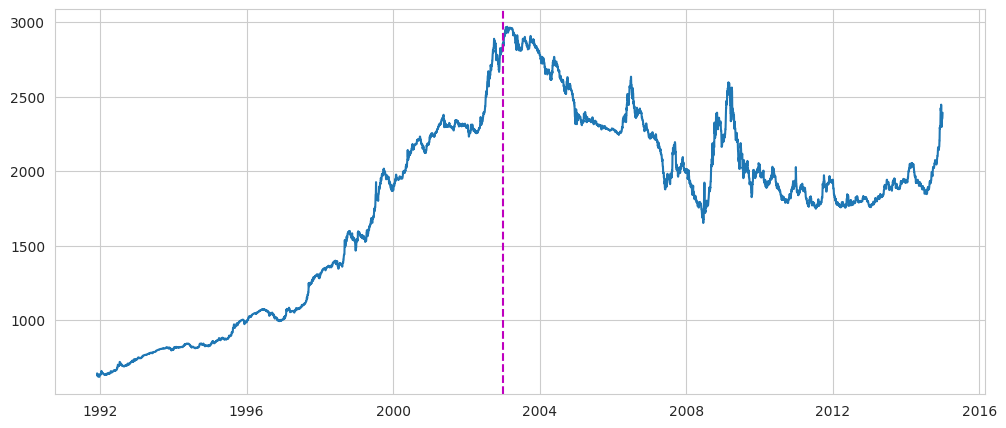

In [18]:
hip1 = data.loc[:"2014-12-31",["VALOR"]]
hip1.loc[:,"POSICION"] = np.arange(1, hip1.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = hip1['VALOR'],
    x = hip1.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("2003-01-01"), color="m", linestyle="--", label="Fin Devaluación COP");

In [19]:
pos1 = hip1.loc["2003-01-01", "POSICION"].item()
result = ChowTest.chow_test(data=hip1, breakpoint=int(pos1), dependent_var="VALOR", independent_vars=["POSICION"])
print(f"Estatístico P = {result['Chow Test Statistic']:.2f}\nValor P       = {result['P-value']:.2g}")

Estatístico P = 24812.12
Valor P       = 1.1e-16


<hr>
<p>Dado que el valor P es inferior a 0.05, rechazamos la hipótesis nula a favor de nuestra hipótesis alternativa.</p>
<p>Concluímos que la estabilización de la política monetaria coincide con un cambio en la tendencia de la TRM.</p>
<hr>
<h3>La crisis inmobiliaria</h3>
<p>Planteamos la hipótesis alternativa de que la crsis inmobiliaria coincide con un cambio en la tendencia de la TRM contra la hipótesis nula de que no lo hace.</p>
<p>En este caso, trabajamos en el período "valle" entre los dos picos de la TRM, y queremos no rechazar la hipótesis nula.</p>
<hr>

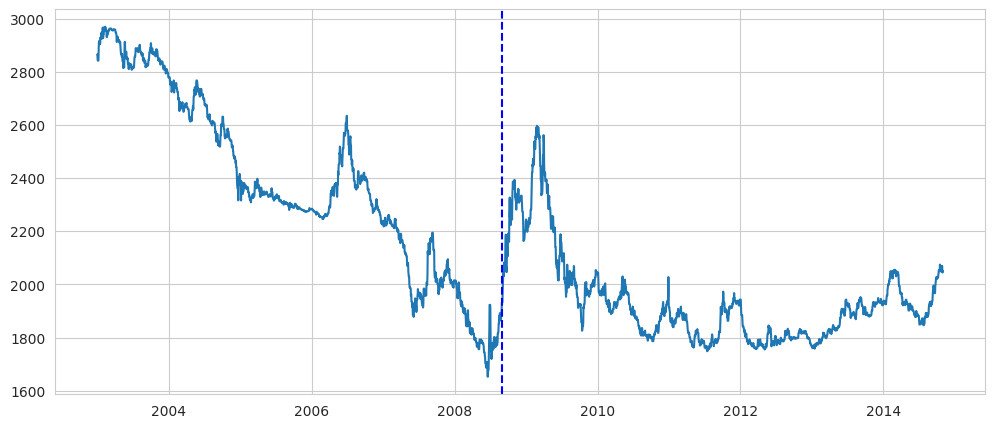

In [20]:
hip2 = data.loc["2003-01-01":"2014-10-31",["VALOR"]]
hip2.loc[:,"POSICION"] = np.arange(1, hip2.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = hip2['VALOR'],
    x = hip2.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("2008-09-01"), color="b", linestyle="--", label="Crisis inmobiliria");

In [21]:
pos2 = hip2.loc["2008-09-01", "POSICION"].item()
result = ChowTest.chow_test(data=hip2, breakpoint=int(pos2), dependent_var="VALOR", independent_vars=["POSICION"])
print(f"Estatístico P = {result['Chow Test Statistic']:.2f}\nValor P       = {result['P-value']:.2g}")

Estatístico P = 2543.64
Valor P       = 1.1e-16


<hr>
<p>Dado que el valor P es inferior a 0.05 debemos rechazar nuestra hipótesis nula a favor de la hipótesis alternativa</p>
<p>Se concluye que la crisis inmobiliaria coincide con un cambio en la tendencia de la TRM</p>
<hr>
<h3>La caída de los precios del petróleo</h3>
<p>Se plantea la hipótesis alternativa de que hay un cambio estructural en 2015-01-01 contra la hipótesis nula de que no lo hay.</p>
<p>Como ya sabemos que hay un cambio estructural en 2008-09-01 tomamos el período desde esa fecha hasta el presente.</p>
<hr>

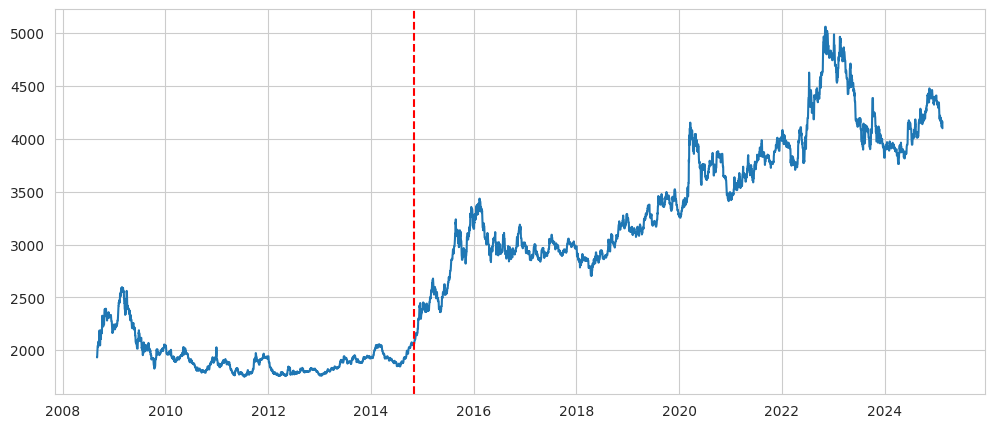

In [22]:
hip3 = data.loc["2008-09-01":,["VALOR"]]
hip3.loc[:,"POSICION"] = np.arange(1, hip3.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = hip3['VALOR'],
    x = hip3.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("2014-11-01"), color="r", linestyle="--", label="Caída Precios del Petróleo");

In [23]:
pos3 = hip3.loc["2014-11-01", "POSICION"].item()
result = ChowTest.chow_test(data=hip3, breakpoint=int(pos3), dependent_var="VALOR", independent_vars=["POSICION"])
print(f"Estatístico P = {result['Chow Test Statistic']:.2f}\nValor P       = {result['P-value']:.2g}")

Estatístico P = 3349.67
Valor P       = 1.1e-16


<hr>
<p>Dado que el valor P es inferior a 0.05, rechazamos la hipótesis nula a favor de nuestra hipótesis alternativa.</p>
<p>Concluimos que la caída de los precios del petróleo coincide con un cambio en la tendencia de la TRM</p>
<hr>
<h2>Conclusiones</h2>
<p>
    <ul>
        <li>La implementación de la prueba empleada es demasiado sensible. Una revisión del código fuente de la librería muestra que se emplean MCO</li>
    </ul>
</p>

# Análisis gráfico exploratorio por segmentos


In [25]:
data['VALOR'].diff()

1991-12-02      NaN
1991-12-03    -4.20
1991-12-04    -3.52
1991-12-05    -4.19
1991-12-06    -4.35
              ...  
2025-02-11    19.23
2025-02-12    20.87
2025-02-13    11.27
2025-02-14    -3.61
2025-02-15   -60.80
Freq: D, Name: VALOR, Length: 12130, dtype: float64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12130 entries, 1991-12-02 to 2025-02-15
Freq: D
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          12130 non-null  float64
 1   UNIDAD         12130 non-null  object 
 2   VIGENCIADESDE  12130 non-null  object 
 3   VIGENCIAHASTA  12130 non-null  object 
dtypes: float64(1), object(3)
memory usage: 731.9+ KB


Text(0, 0.5, 'Hola')

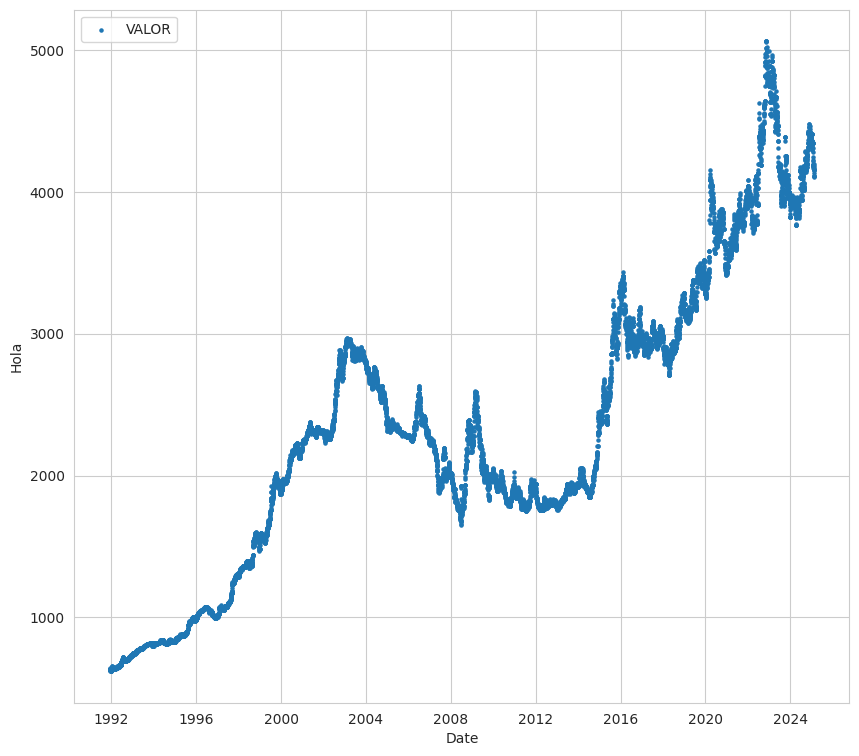

In [93]:
plt.figure(figsize = (10, 9))

lw = 5
alpha = 1

for column in data.columns:
    if column in ['UNIDAD', 'VIGENCIADESDE', 'VIGENCIAHASTA']:
        continue
    plt.scatter(data.index, data[column], label = column, s = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.3

plt.legend()
plt.xlabel('Date');
plt.ylabel('Hola')

In [94]:
data

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
...,...,...,...,...
2025-02-11,4132.93,COP,11/02/2025,11/02/2025
2025-02-12,4153.80,COP,12/02/2025,12/02/2025
2025-02-13,4165.07,COP,13/02/2025,13/02/2025
2025-02-14,4161.46,COP,14/02/2025,14/02/2025


In [26]:
data_w = data['VALOR'].resample('W').agg({
        "VALOR": "mean"
})
data_w

,VALOR
1991-12-08,636.161429
1991-12-15,630.814286
1991-12-22,625.708571
1991-12-29,626.548571
1992-01-05,634.920000
...,...
2025-01-19,4327.964286
2025-01-26,4270.884286
2025-02-02,4194.541429
2025-02-09,4156.368571


In [ ]:
plt.figure(figsize = (10, 9))

lw = 2
alpha = 1

for column in data_d.columns:
    if column in ['']:
        continue
    elif column == 'volume':
        plt.plot(df_w.index, df_w[column] / 10000, label = f"{column} $/10^4$", linewidth = 3, alpha = 0.5)
    else:
        plt.plot(df_w.index, df_w[column], label = column, linewidth = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.2

plt.legend()
plt.xlabel('Date');

In [39]:
data_d = data.resample('D').agg({
    "VALOR": "mean"
})
data_d.head(15)

,VALOR
1991-12-02,643.42
1991-12-03,639.22
1991-12-04,635.70
1991-12-05,631.51
1991-12-06,627.16
1991-12-07,638.06
1991-12-08,638.06
1991-12-09,638.06
1991-12-10,622.92
1991-12-11,627.46


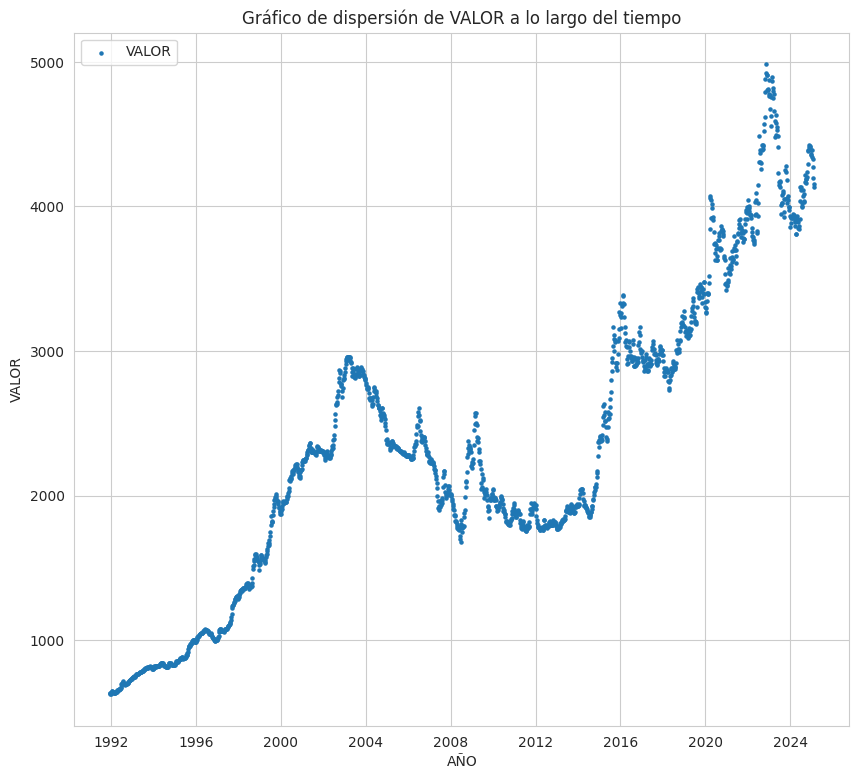

In [38]:
#Configuración del tamaño de la figura
plt.figure(figsize=(10, 9))

# Parámetros iniciales para el tamaño y la transparencia de los puntos
lw = 5  # Tamaño inicial de los puntos
alpha = 1  # Transparencia inicial (totalmente opaco)

# Iterar sobre las columnas del DataFrame
for column in data_d.columns:
    # Solo graficar si la columna es "VALOR"
    if column == "VALOR":
        plt.scatter(
            data_d.index,  # Eje X: Fechas (índice del DataFrame)
            data_d[column],  # Eje Y: Valores de la columna "VALOR"
            label=column,  # Etiqueta para la leyenda
            s=lw,  # Tamaño de los puntos
            alpha=alpha  # Transparencia de los puntos
        )
        # Reducir el tamaño y la transparencia para el siguiente punto (si hubiera más columnas)
        lw -= 0.6
        alpha -= 0.3

# Añadir leyenda, etiquetas y título
plt.legend()
plt.xlabel('AÑO')
plt.ylabel('VALOR')
plt.title('Gráfico de dispersión de VALOR a lo largo del tiempo')

# Mostrar el gráfico
plt.show()